In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
import sys
import os
if "../" not in sys.path:
  sys.path.append("../") 
os.chdir("..") 
from envs.data_handler import DataHandler
import envs.data_utils as du

,Optimal_Affected_Component_Uid,Optimal_Failure,raw
0,_SEwwu-cdEeet0YmmfbMwkw,CF1,49.5
1,_SExXgOcdEeet0YmmfbMwkw,CF2,16.0
2,_SEx_HucdEeet0YmmfbMwkw,CF3,31.5
3,_SEymDucdEeet0YmmfbMwkw,CF3,25.0
4,_SExYKucdEeet0YmmfbMwkw,CF3,16.0


# Data Transformation
Analysing the distribution of the values of each transformed dataset.

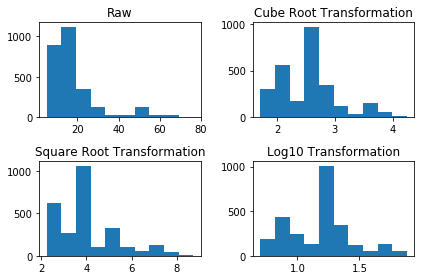

In [3]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
dh = DataHandler(data_generation='Linear', take_component_id=True, transformation='raw')
plt.hist(dh.data['raw'])
ax1.title.set_text('Raw')

ax2 = fig.add_subplot(222)
dh = DataHandler(data_generation='Linear', take_component_id=True, transformation='cube')
plt.hist(dh.data['cube'])
ax2.title.set_text('Cube Root Transformation')

ax3 = fig.add_subplot(223)
dh = DataHandler(data_generation='Linear', take_component_id=True, transformation='sqt')
plt.hist(dh.data['sqt'])
ax3.title.set_text('Square Root Transformation')

ax4 = fig.add_subplot(224)
dh = DataHandler(data_generation='Linear', take_component_id=True, transformation='log10')
plt.hist(dh.data['log10'])
ax4.title.set_text('Log10 Transformation')

plt.tight_layout()
plt.show()

# Comparison of the results

## Skewness

([<matplotlib.axis.XTick at 0x1298bdc40>,
 [Text(0, 0, 'Raw'),
  Text(0, 0, 'Cube Root Transformation'),
  Text(0, 0, 'Square Root Transformation'),
  Text(0, 0, 'Log10 Transformation')])

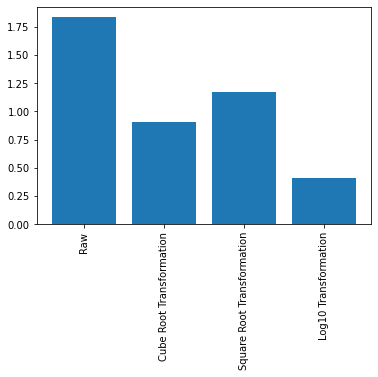

In [5]:
un_skew = dh.data['raw'].skew()
cub_skew = dh.data['cube'].skew()
sqt_skw = dh.data['sqt'].skew()
log_skw = dh.data['log10'].skew()

labels = ['Raw', 'Cube Root Transformation', 'Square Root Transformation', 'Log10 Transformation']
xticks = range(len(labels))

plt.bar(xticks, [un_skew, cub_skew, sqt_skw, log_skw])
plt.xticks(xticks, labels, rotation='vertical')

## Kurtosis

([<matplotlib.axis.XTick at 0x129754e50>,
 [Text(0, 0, 'Raw'),
  Text(0, 0, 'Cube Root Transformation'),
  Text(0, 0, 'Square Root Transformation'),
  Text(0, 0, 'Log10 Transformation')])

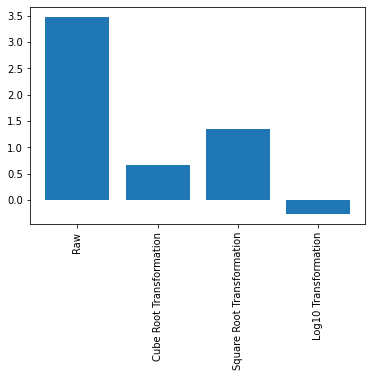

In [6]:
un_krt = dh.data['raw'].kurtosis()
cub_krt = dh.data['cube'].kurtosis()
sqt_krt = dh.data['sqt'].kurtosis()
log_krt = dh.data['log10'].kurtosis()

labels = ['Raw', 'Cube Root Transformation', 'Square Root Transformation', 'Log10 Transformation']
xticks = range(len(labels))

plt.bar(xticks, [un_krt, cub_krt, sqt_krt, log_krt])
plt.xticks(xticks, labels, rotation='vertical')

# Furhter Analyzing Ideas

In [6]:
# Kullback divergence / distance
#bins = np.arange(0,3.5,0.1)
#hist_untransformed = np.histogram(result_skw['untransformed'].values.tolist(), bins=bins)[0]
#hist_cube = np.histogram(result_skw['cube'].values.tolist(), bins=bins)[0]
#entropy(hist_untransformed, qk=hist_cube)